# [CNN 기법 중 하나인 VGG 모델 (사전 학습된 모델)을 사용하여 검증하기]
# 대용량으로 사전에 학습되었던 외부의 모델을 가져와 model을 구성한다.

In [1]:
import torch
import torch.nn as nn

from torchvision.models.vgg import vgg16
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

model = vgg16(pretrained = True)

fc = nn.Sequential(
    nn.Linear(512*7*7, 4096),
    nn.ReLU(),
    nn.Dropout(),
    
    nn.Linear(4096, 4096),
    nn.ReLU(),
    nn.Dropout(),
    
    nn.Linear(4096, 10)
) # 마지막 MLP Layer의 연산

model.classifier = fc
model.to(device)

cuda


/home/enitt/miniconda3/envs/enitt/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/enitt/miniconda3/envs/enitt/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [2]:
from tqdm.auto import tqdm

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose, ToTensor, Resize
from torchvision.transforms import RandomHorizontalFlip, RandomCrop, Normalize
from torch.utils.data.dataloader import DataLoader

from torch.optim.adam import Adam

transforms = Compose([
    Resize(224),
    RandomCrop((224,224), padding=4),
    RandomHorizontalFlip(p=0.5),
    ToTensor(),
    Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261))
])

In [3]:
train_data = CIFAR10(root='./', train=True, download=True, transform=transforms)
test_data = CIFAR10(root='./', train=False, download=True, transform=transforms)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=True)

lr = 1e-4
optim = Adam(model.parameters(), lr=lr)

for epoch in range(30):
    iterator = tqdm(train_loader)
    for data, label in iterator:
        optim.zero_grad()
        
        preds = model(data.to(device))
        
        loss = nn.CrossEntropyLoss()(preds, label.to(device))
        loss.backward()
        optim.step()
        
        iterator.set_description(f'epoch:{epoch+1} loss:{loss.item():.2f}')
        
torch.save(model.state_dict(), 'CIFAR_pretrained.pth')

Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

In [8]:
model.load_state_dict(torch.load('CIFAR_pretrained.pth', map_location=device))

num_corr = 0
incorr_img_list = []

with torch.no_grad():
    for data, label in test_loader:
        output = model(data.to(device))
        preds = output.data.max(1)[1]
        
        corr_list = preds.eq(label.to(device).data)
        corr = corr_list.sum().item()
        num_corr += corr
        
        for idx, corr_data in enumerate(corr_list):
            if not corr_data.item():
                incorr_img_list.append({
                    'incorr_idx' : corr_list[idx].item(),
                    'incorr_img_data' : data[idx].cpu(),
                    'answer_idx' : label[idx].item(),
                })
        
    print(f'정확도({num_corr}/{len(test_data)}) : {num_corr / len(test_data) * 100}%')
    print(f'오답으로 저장된 데이터 갯수 : {len(incorr_img_list)}')

정확도(9183/10000) : 91.83%
오답으로 저장된 데이터 갯수 : 817


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

오답 갯수 : 817
오답 이미지 Head 12개 출력


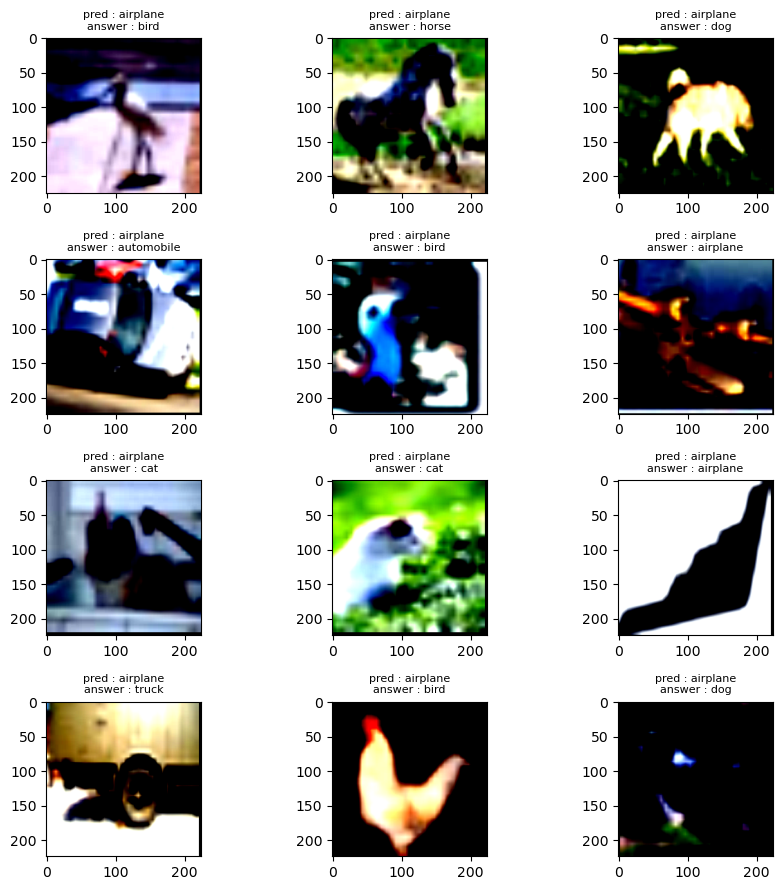

In [9]:
import matplotlib.pyplot as plt

aswer_features = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


print(f'오답 갯수 : {len(incorr_img_list)}')
print('오답 이미지 Head 12개 출력')
fig, axs = plt.subplots(figsize=(9, 9), nrows=4, ncols=3, tight_layout=True)

for idx in range(12):
    row = idx // 3 
    col = idx % 3
    
    image = incorr_img_list[idx]['incorr_img_data'].numpy()
    image = image.transpose(1, 2, 0)  # 채널 차원을 맨 뒤로 이동

    predict_name = aswer_features[incorr_img_list[idx]['incorr_idx']]
    answer_name = aswer_features[incorr_img_list[idx]["answer_idx"]]
    
    axs[row, col].set_title(f'pred : {predict_name}\nanswer : {answer_name}', fontsize=8)
    axs[row, col].imshow(image) 

plt.show()